# Visualization of MRI Data and Labelmaps

This notebook contains a tutorial for visualizing medical images, in particular MRI data and Labelmaps. For this purpose we are going to use the library [SimpleITK](https://github.com/SimpleITK/SimpleITK).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

## Dataset visualization

First we will load the MRI data, which is made up of 2D images stacked to form a 3D volume. This is saved in the NIfTI format. We will use the `sitk.ReadImage` function to load the data. The data is then converted to a numpy array using the `sitk.GetArrayFromImage` function. The array has a three-dimensional shape, along which the MRI images are stored. We will use the `show_slices` function to visualize the slices of the MRI data.

In [3]:
path_to_mri = os.path.join("../..", "data", "mri", "00001.nii")
mri_1 = sitk.ReadImage(path_to_mri)
mri_1_data = sitk.GetArrayFromImage(mri_1)
print(f"{mri_1_data.shape=}")

mri_1_data.shape=(61, 864, 606)


Since we are interested in the transversal view of the hand, the function displays the images stored in the second dimension of the array. The function takes as input the data to slice, the start index and the number of images to display as well as the step size. The colormap is set to gray.

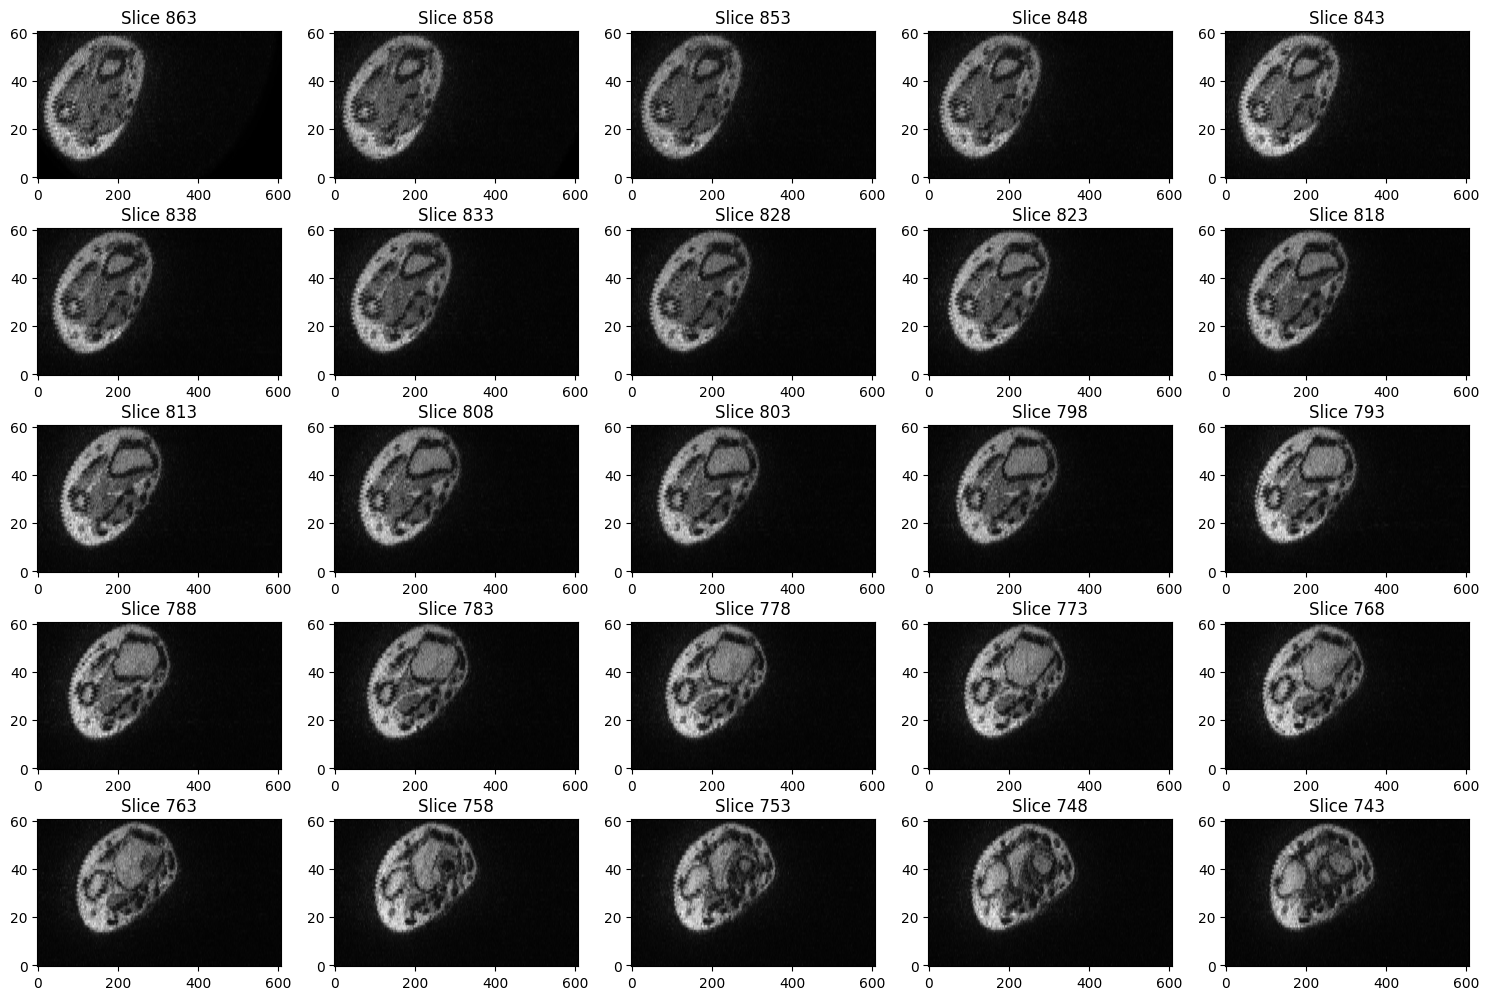

In [4]:
from armscan_env.util.visualizations import show_slices

show_slices(data=mri_1_data, start=mri_1_data.shape[1] - 1, end=25, lap=5, cmap="gray")
plt.show()

## Label dataset

Next we will load the label data, which is also saved in the NIfTI format. The labelmaps have been created by manually segmenting the relevant tissues in the MRI data. This segmentation has been performed using [ImFusion](https://www.imfusion.com/). The labelmaps are saved in the same coordinate system as the MRI data. Since they are saved in the same way as the MRI images, we can use the same functions to load and visualize them.

In [5]:
path_to_mri = os.path.join("../..", "data", "labels", "00001_labels.nii")
mri_1_label = sitk.ReadImage(path_to_mri)
mri_1_label_data = sitk.GetArrayFromImage(mri_1_label)
print(f"{mri_1_label_data.shape =}")

mri_1_label_data.shape =(61, 864, 606)


What is shown in the images, are the labeled tissues, hence bones, tendons, median nerve and ulnar artery.

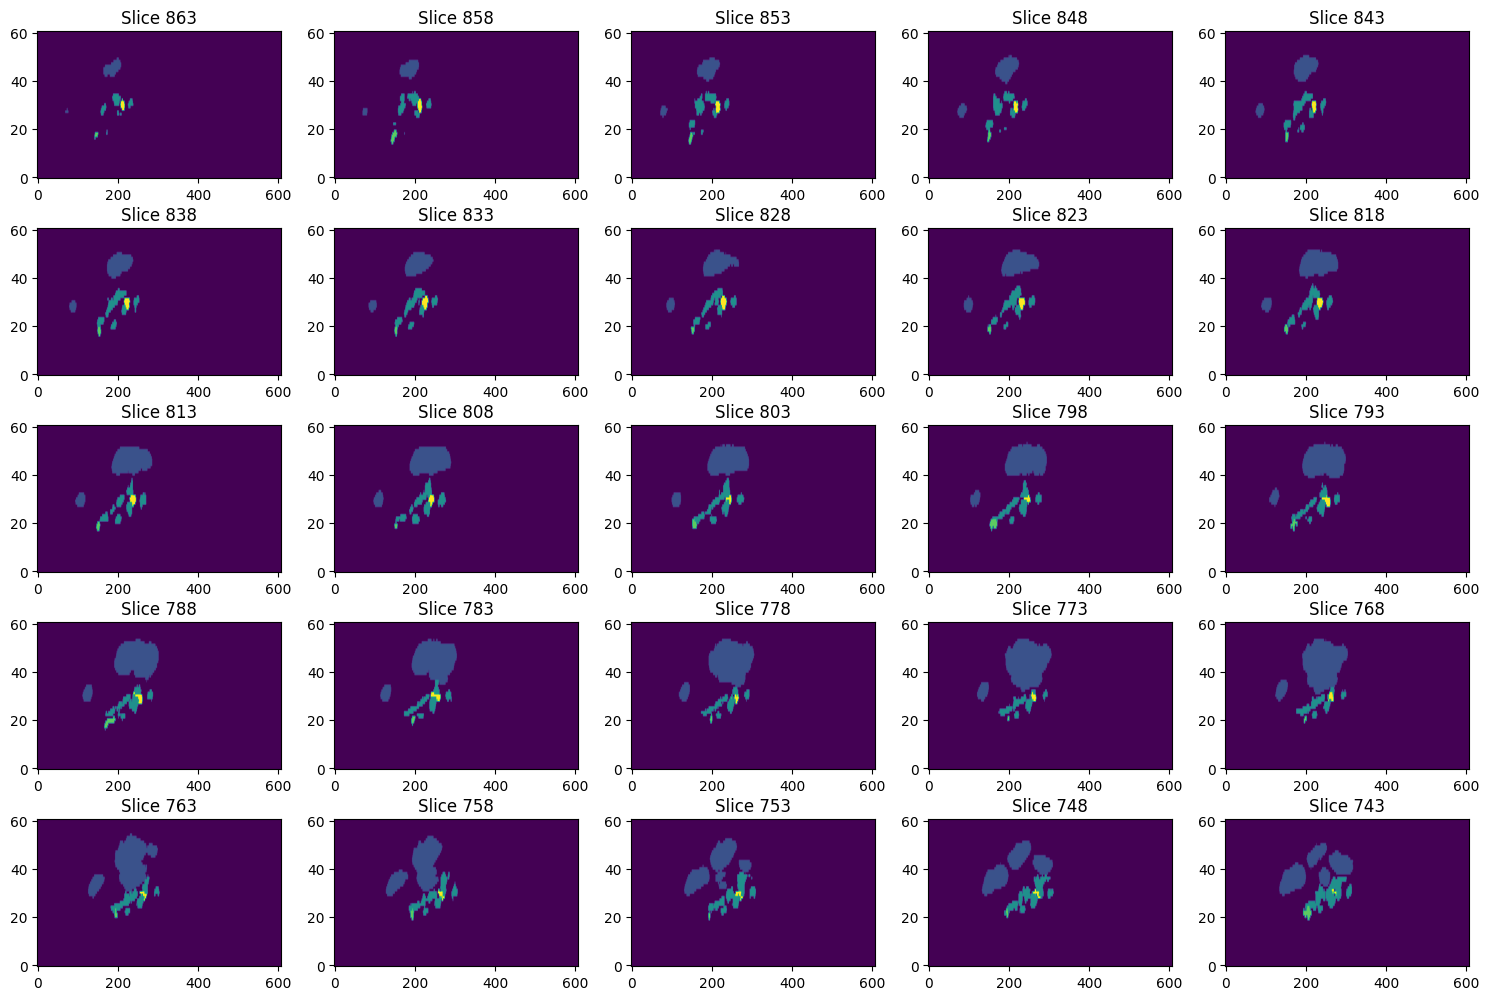

In [6]:
show_slices(mri_1_label_data, mri_1_label_data.shape[1] - 1, 25, 5)
plt.show()

The labels are nothing else then standard values given to each tissue:
- 0: background
- 1: bones
- 2: tendons
- 3: ulnar artery
- 4: median nerve

In [7]:
print("Max value in mri labeled data: ", np.max(mri_1_label_data))
print("Max value in mri data: ", np.max(mri_1_data))

Max value in mri labeled data:  4
Max value in mri data:  693
